In [1]:
import os 

os.chdir("/hdd_14T/data/PXD031322_oxaliplatin_dia_study/ftp.pride.ebi.ac.uk/pride/data/archive/2022/07/PXD031322/supplementary_material")


In [2]:
import pandas as pd 

ST_ctrl = pd.read_excel("S2_list_of_proteins_differentially_regulated_between_ST_and_Ctrl.xlsx", header = 1)
LT_ctrl = pd.read_excel("S3_list_of_proteins_differentially_regulated_between_LT_and_Ctrl.xlsx", header = 1)
diffReg = pd.read_excel("S4_list_of_differential_regulation_protein_in_six_subclusters.xlsx", header = 1)
keggEnrichment = pd.read_excel("S5_KEGG_enrichment_analysis_of_proteins_in_six_subclusters.xlsx", header = 1)
gsvaEnrichment = pd.read_excel("S6_GSVA_enrichment_analysis.xlsx", header = 1)

In [3]:
st_ctrl_from_supplement_file_2 = pd.concat([ST_ctrl[~ST_ctrl["Condition"].isin(["Not_sig"]) & (ST_ctrl['log2（FC）'] > 1.5) ], 
ST_ctrl[~ST_ctrl["Condition"].isin(["Not_sig"]) & (ST_ctrl['log2（FC）'] > 0.67)]])


In [4]:
lt_ctrl_from_supplement_file_3 = pd.concat([LT_ctrl[~LT_ctrl["Condition"].isin(["Not_sig"]) & (LT_ctrl['log2（FC）'] > 1.5) ],
LT_ctrl[~LT_ctrl["Condition"].isin(["Not_sig"]) & (LT_ctrl['log2（FC）'] > 0.67)]])


In [5]:
diffReg = diffReg[~diffReg["Condition"].isin(["Others"])]

lt_st = pd.concat([diffReg[(diffReg["LT-ST_diff"] > 1.5) & (diffReg["LT-ST_p adj"] < 0.05)], diffReg[(diffReg["LT-ST_diff"] < 0.67) & (diffReg["LT-ST_p adj"] < 0.05)] ])
st_ctrl = pd.concat([diffReg[(diffReg["ST-Ctrl_diff"] > 1.5) & (diffReg["ST-Ctrl_p adj"] < 0.05)], diffReg[(diffReg["ST-Ctrl_diff"] < 0.67) & (diffReg["ST-Ctrl_p adj"] < 0.05)] ])
lt_ctrl = pd.concat([diffReg[(diffReg["LT-Ctrl_diff"] > 1.5) & (diffReg["LT-Ctrl_p adj"] < 0.05)], diffReg[(diffReg["LT-Ctrl_diff"] < 0.67) & (diffReg["LT-Ctrl_p adj"] < 0.05)] ])

st_ctrl_from_supplement_file_4 = st_ctrl
lt_ctrl_from_supplement_file_4 = lt_ctrl


# NOTE: 
 
## S2 is the list of differentially regulated proteins between ST and Ctrl
## S3 is the list of differentially regulated proteins between LT and Ctrl
## S4 is the list of differentially regulated proteins in the six subclusters


In [6]:
print("Number of significant differentially regulated proteins in supplementary file 2: " + str(len(st_ctrl_from_supplement_file_2)))
print("Number of significant differentially regulated proteins in supplementary file 3: " + str(len(lt_ctrl_from_supplement_file_3)))
print("Number of significant differentially regulated proteins in supplementary file 4: " + str(len(st_ctrl_from_supplement_file_4)))
print("Number of significant differentially regulated proteins in supplementary file 4: " + str(len(lt_ctrl_from_supplement_file_4)))


Number of significant differentially regulated proteins in supplementary file 2: 82
Number of significant differentially regulated proteins in supplementary file 3: 312
Number of significant differentially regulated proteins in supplementary file 4: 468
Number of significant differentially regulated proteins in supplementary file 4: 849


## Investigating the fold-changes ST-Ctrl supplmentary file 2

0.67 < FC < 1.5

92 up-regulated proteins in ST-Ctrl
188 down-regulated proteins in ST-Ctrl

296 up-regulated proteins in LT-Ctrl
422 down-regulated proteins in LT-Ctrl

53 up-regulated proteins are shared between ST and LT groups
111 down-regulated proteins are shared between ST and LT groups

Text from section 3.1 in the report (PXD031322):

Next, we compared the protein abundance between the two OXA-treated groups and the control mice using FC > 1.5 or FC < 0.67 and adjusted P value <0.05 as the cutoff threshold. As a result, we found 92 proteins up-regulated and 188 proteins down-regulated in the ST group compared to Ctrl (Fig. 2C and Supplemental Table S2). Meanwhile, 296 proteins were up-regulated and 422 proteins were down-regulated in the LT group (Fig. 2D and Supplemental Table S3). Moreover, 53 up-regulated proteins and 111 down-regulated proteins were shared between the ST and LT groups (Supplemental Fig. S1D). The results revealed that OXA treatment altered protein abundance in DRG tissues, and the proteome changes were affected by drug dose.


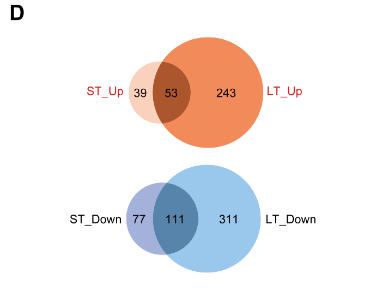

In [7]:
ST_ctrl[(ST_ctrl["Adjusted_P_value"] < 0.05) & (ST_ctrl["log2（FC）"] > 1.5)]

,Protein.Ids,Gene_Symbol,First.Protein.Description,log2（FC）,log2（protein.intensity）,P_value,Adjusted_P_value,Condition
9,A2ABU4,Myom3,Myomesin-3,1.727125,19.569754,0.007688,0.041938,Up
58,E9PZQ0,Ryr1,Ryanodine receptor 1,1.719560,21.005710,0.003520,0.026367,Up
149,O35379,Abcc1,Multidrug resistance-associated protein 1,1.774881,16.808166,0.001646,0.016784,Up
325,O89104,Sypl2,Synaptophysin-like protein 2,1.786095,21.044375,0.003386,0.025947,Up
359,P03987,NaN,Ig gamma-2A chain C region secreted form,1.993856,20.503970,0.000049,0.002788,Up
728,P40936,Inmt,Indolethylamine N-methyltransferase,1.714115,18.107524,0.000027,0.002182,Up
1294,Q3KNY0,Igfn1,Immunoglobulin-like and fibronectin type III d...,2.494612,16.364348,0.001305,0.014728,Up
1331,Q3TVI8,Pbxip1,Pre-B-cell leukemia transcription factor-inter...,1.601706,18.226358,0.007330,0.040682,Up
1401,Q3USB7,Plcl1,Inactive phospholipase C-like protein 1,2.925169,17.383983,0.000127,0.004630,Up
1704,Q64691,Capn3,Calpain-3,2.298162,16.539455,0.006861,0.038871,Up


In [8]:
ST_ctrl[ST_ctrl.Condition == "Up"]["Adjusted_P_value"].max()

0.047863207906366

In [9]:
ST_ctrl[ST_ctrl.Condition == "Down"]["Adjusted_P_value"].max()

0.0490167551966368

In [10]:
ST_ctrl[ST_ctrl.Condition == "Up"]["log2（FC）"].max()

2.92516942287782

In [11]:
ST_ctrl[ST_ctrl.Condition == "Up"]["log2（FC）"].min()

0.592748916715291

In [12]:
ST_ctrl[ST_ctrl.Condition == "Down"]["log2（FC）"].max()

-0.587031387105799

In [13]:
ST_ctrl[ST_ctrl.Condition == "Down"]["log2（FC）"].min()

-5.76879640601209

### Conclusion

The maximum adjusted p-value seems to be 0.05 for supplementary file 2

The FC-threshold seems to be   FC < -0.6 and FC > 0.6 for the ST-ctrl group

## Investigating the fold-changes LT-Ctrl supplementary file 3


In [14]:
LT_ctrl[(LT_ctrl["Adjusted_P_value"] < 0.05) & (LT_ctrl["log2（FC）"] > 1.5)]

,Protein.Ids,Gene_Symbol,First.Protein.Description,log2（FC）,log2（protein.intensity）,P_value,Adjusted_P_value,Condition
7,A2AAJ9,Obscn,Obscurin,1.882176,21.722283,0.008617,0.032117,Up
23,A2AUC9,Klhl41,Kelch-like protein 41,1.531751,21.427499,0.002466,0.012997,Up
31,A6X935,Itih4,"Inter alpha-trypsin inhibitor, heavy chain 4",1.956590,22.004443,0.000006,0.000271,Up
32,B1AVD1,Xpnpep2,Xaa-Pro aminopeptidase 2,1.755934,18.084087,0.015465,0.048786,Up
58,E9PZQ0,Ryr1,Ryanodine receptor 1,1.976667,21.024448,0.004290,0.019577,Up
...,...,...,...,...,...,...,...,...
3563,Q9QXF8,Gnmt,Glycine N-methyltransferase,3.647686,16.738235,0.006427,0.026341,Up
3625,Q9R0A1,Clcn2,Chloride channel protein 2,1.637763,18.791353,0.000241,0.002924,Up
3630,Q9R0G6,Comp,Cartilage oligomeric matrix protein,1.608153,19.969354,0.000053,0.001068,Up
3687,Q9WU79,Prodh,"Proline dehydrogenase 1, mitochondrial",1.690775,17.161081,0.007404,0.028844,Up


In [15]:
LT_ctrl[LT_ctrl.Condition == "Up"]["Adjusted_P_value"].max()

0.0495416969174467

In [16]:
LT_ctrl[LT_ctrl.Condition == "Down"]["Adjusted_P_value"].max()

0.0499204385622022

In [17]:
LT_ctrl[LT_ctrl.Condition == "Up"]["log2（FC）"].max()

9.09179785752679

In [18]:
LT_ctrl[LT_ctrl.Condition == "Up"]["log2（FC）"].min()

0.585655883293821

In [19]:
LT_ctrl[LT_ctrl.Condition == "Down"]["log2（FC）"].max()

-0.585003797367708

In [20]:
LT_ctrl[LT_ctrl.Condition == "Down"]["log2（FC）"].min()

-9.39793433825828

### Conclusion

The maximum adjusted p-value seems to be 0.05 for supplementary file 3

The FC-threshold seems to be FC < -0.6 and FC > 0.6 for the ST-ctrl group

## Investigating the fold-changes ST-Ctrl supplementary file 4

In [21]:
diffReg = diffReg[~diffReg["Condition"].isin(["Others"])]
diffReg.set_index(["Protein.Ids", "Gene.Symbol"], inplace = True)

In [22]:
diffReg

,,First.Protein.Description,ST-Ctrl_diff,ST-Ctrl_p adj,LT-Ctrl_diff,LT-Ctrl_p adj,LT-ST_diff,LT-ST_p adj,Condition
Protein.Ids,Gene.Symbol,,,,,,,,
A2AGT5,Ckap5,Cytoskeleton-associated protein 5,0.142507,0.207542,-0.128627,0.306358,-0.271134,0.018850,C4
A3KMP2,Ttc38,Tetratricopeptide repeat protein 38,-0.027055,0.968188,0.446700,0.007929,0.473755,0.005392,C3
A6H5Y3,Mtr,Methionine synthase,0.322126,0.005789,0.306277,0.011615,-0.015849,0.981586,C5
A6X8Z5,Arhgap31,Rho GTPase-activating protein 31,-0.121535,0.826330,0.469724,0.122217,0.591259,0.048175,C3
A6X935,Itih4,"Inter alpha-trypsin inhibitor, heavy chain 4",0.712827,0.024456,1.956590,0.000017,1.243763,0.000878,C1
...,...,...,...,...,...,...,...,...,...
Q9Z2M7,Pmm2,Phosphomannomutase 2,-0.089319,0.788624,0.337358,0.088092,0.426677,0.030502,C3
Q9Z2N8,Actl6a,Actin-like protein 6A,-0.583078,0.000662,-0.536855,0.001981,0.046223,0.917355,C6
Q9Z2U1,Psma5,Proteasome subunit alpha type-5,-0.284836,0.000765,-0.180117,0.024713,0.104719,0.211689,C6


In [23]:
diffReg_st_ctrl = diffReg.T[diffReg.columns.str.contains("ST-C|Co")].T
diffReg_lt_ctrl = diffReg.T[diffReg.columns.str.contains("LT-C|Co")].T


In [24]:
 # C5 is up-regulated between st-ctrl, C6 is down-regulated between st-ctrl

    
diffReg_st_ctrl[diffReg_st_ctrl["Condition"] == "C5"]["ST-Ctrl_p adj"].max()

0.0492917166078002

In [25]:
diffReg_st_ctrl[diffReg_st_ctrl["Condition"] == "C6"]["ST-Ctrl_p adj"].max()

0.0489101737103306

In [26]:
diffReg_st_ctrl[diffReg_st_ctrl["Condition"] == "C5"]["ST-Ctrl_diff"].max()

2.92516942287782

In [27]:
diffReg_st_ctrl[diffReg_st_ctrl["Condition"] == "C5"]["ST-Ctrl_diff"].min()

0.100961586288616

In [28]:
diffReg_st_ctrl[diffReg_st_ctrl["Condition"] == "C6"]["ST-Ctrl_diff"].max()

-0.157645014458168

In [29]:
diffReg_st_ctrl[diffReg_st_ctrl["Condition"] == "C6"]["ST-Ctrl_diff"].min()

-5.76879640601209

### Conclusion

The maximum adjusted p-value seems to be 0.05 for supplementary file 4

The FC-threshold seems to be FC < -0.15 and FC > 0.1 for the ST-ctrl group

## Investigating the fold-changes LT-Ctrl supplementary file 4

In [30]:
 # C1 is up-regulated between st-ctrl, C2 is down-regulated between st-ctrl


diffReg_lt_ctrl[diffReg_lt_ctrl["Condition"] == "C1"]["LT-Ctrl_p adj"].max()

0.00056301274508197

In [31]:
diffReg_lt_ctrl[diffReg_lt_ctrl["Condition"] == "C2"]["LT-Ctrl_p adj"].max()

0.000538920791776087

In [32]:
diffReg_lt_ctrl[diffReg_lt_ctrl["Condition"] == "C1"]["LT-Ctrl_diff"].max()

6.31327002847166

In [33]:
diffReg_lt_ctrl[diffReg_lt_ctrl["Condition"] == "C1"]["LT-Ctrl_diff"].min()

0.515110009334432

In [34]:
diffReg_lt_ctrl[diffReg_lt_ctrl["Condition"] == "C2"]["LT-Ctrl_diff"].max()

-0.287517677034845

In [35]:
diffReg_lt_ctrl[diffReg_lt_ctrl["Condition"] == "C2"]["LT-Ctrl_diff"].min()

-9.39793433825827

In [ ]:
### Conclusion

The maximum adjusted p-value seems to be 0.0006 (?) for supplementary file 4

The FC-threshold seems to be FC < -0.15 and FC > 0.1 for the ST-ctrl group